In [1]:
pip install pyreadstat

In [2]:
import pyreadstat
import pandas as pd

# .sav dosyasını oku
data, meta = pyreadstat.read_sav('C:/Users/pervi/OneDrive/Desktop/A123.sav')
sinir = pd.read_csv('C:/Users/pervi/OneDrive/Desktop/sinir.csv')
print(data.head())
print(sinir.head())

    ID varbs    a    t    p    s   auc.AUC  auc.ll.ll  auc.ul.ul  cut.off  \
0  1.0    A1  1.0  1.0  1.0  1.0  0.505556   0.352021   0.659090     16.0   
1  2.0    A1  1.0  1.0  1.0  2.0  0.589444   0.434128   0.744761     13.0   
2  3.0    A1  1.0  1.0  1.0  3.0  0.588333   0.427704   0.748963     11.0   
3  4.0    A1  1.0  1.0  1.0  4.0  0.757222   0.622488   0.891957     13.0   
4  5.0    A1  1.0  1.0  1.0  5.0  0.610556   0.451425   0.769686     15.0   

   ...  bias.acc  bias.sen   bias.sp  bias.cut  pc.bias.acc  pc.bias.sen  \
0  ... -0.050000  0.000000 -0.100000      -4.0    -7.692308     0.000000   
1  ... -0.016667  0.000000 -0.033333      -1.0    -2.325581     0.000000   
2  ...  0.000000 -0.033333  0.033333       2.0     0.000000    -6.666667   
3  ... -0.033333  0.000000 -0.066667      -1.0    -4.000000     0.000000   
4  ...  0.000000  0.000000  0.000000       0.0     0.000000     0.000000   

   pc.bias.sp  pc.bias.cut  mean.cut  diff.cut  
0  -10.000000   -25.000000     

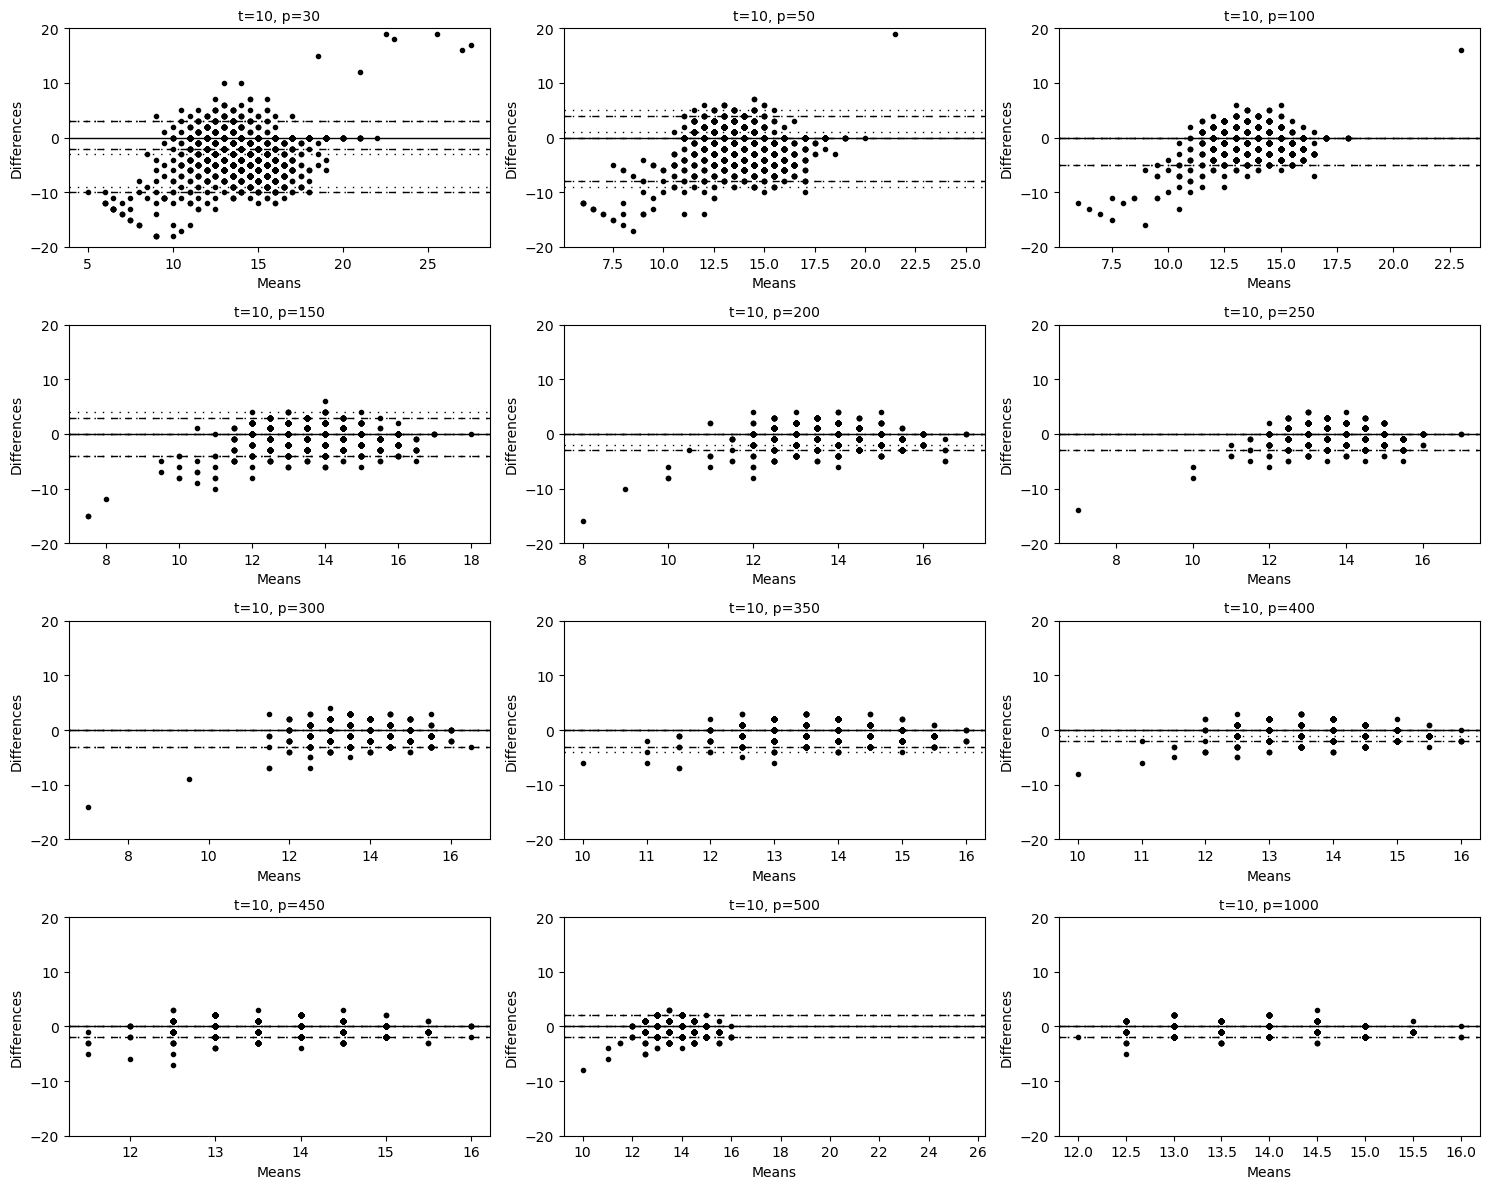

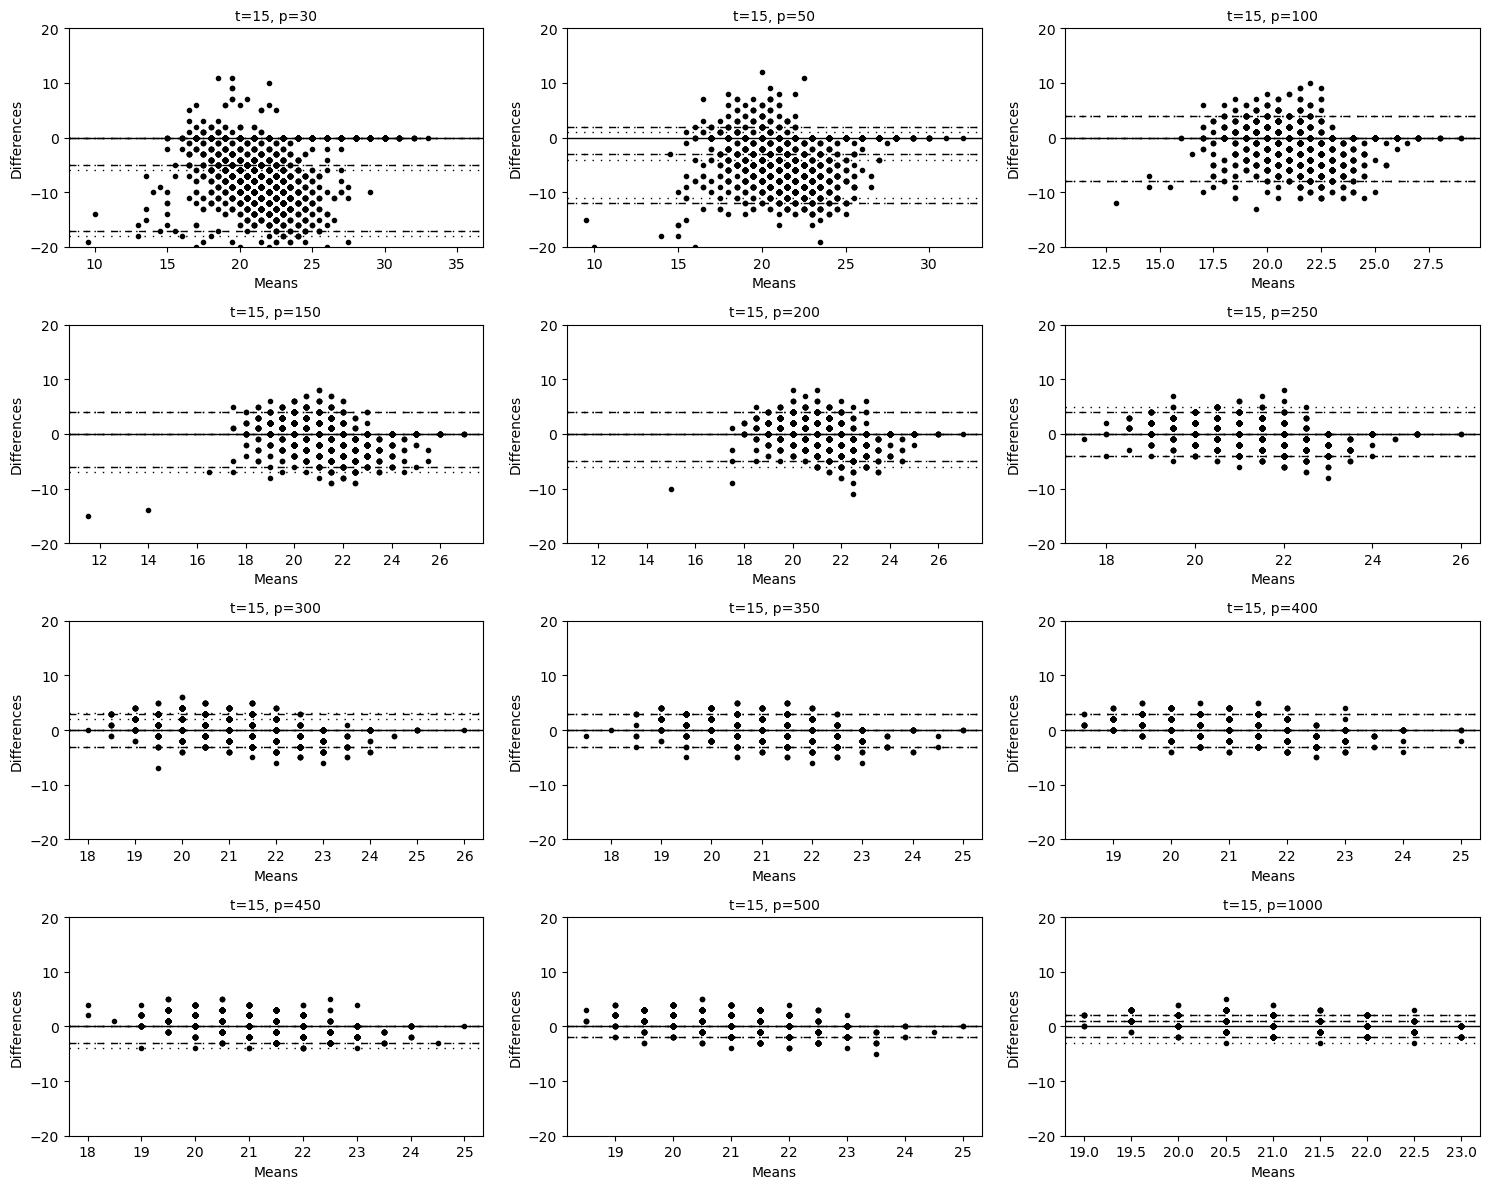

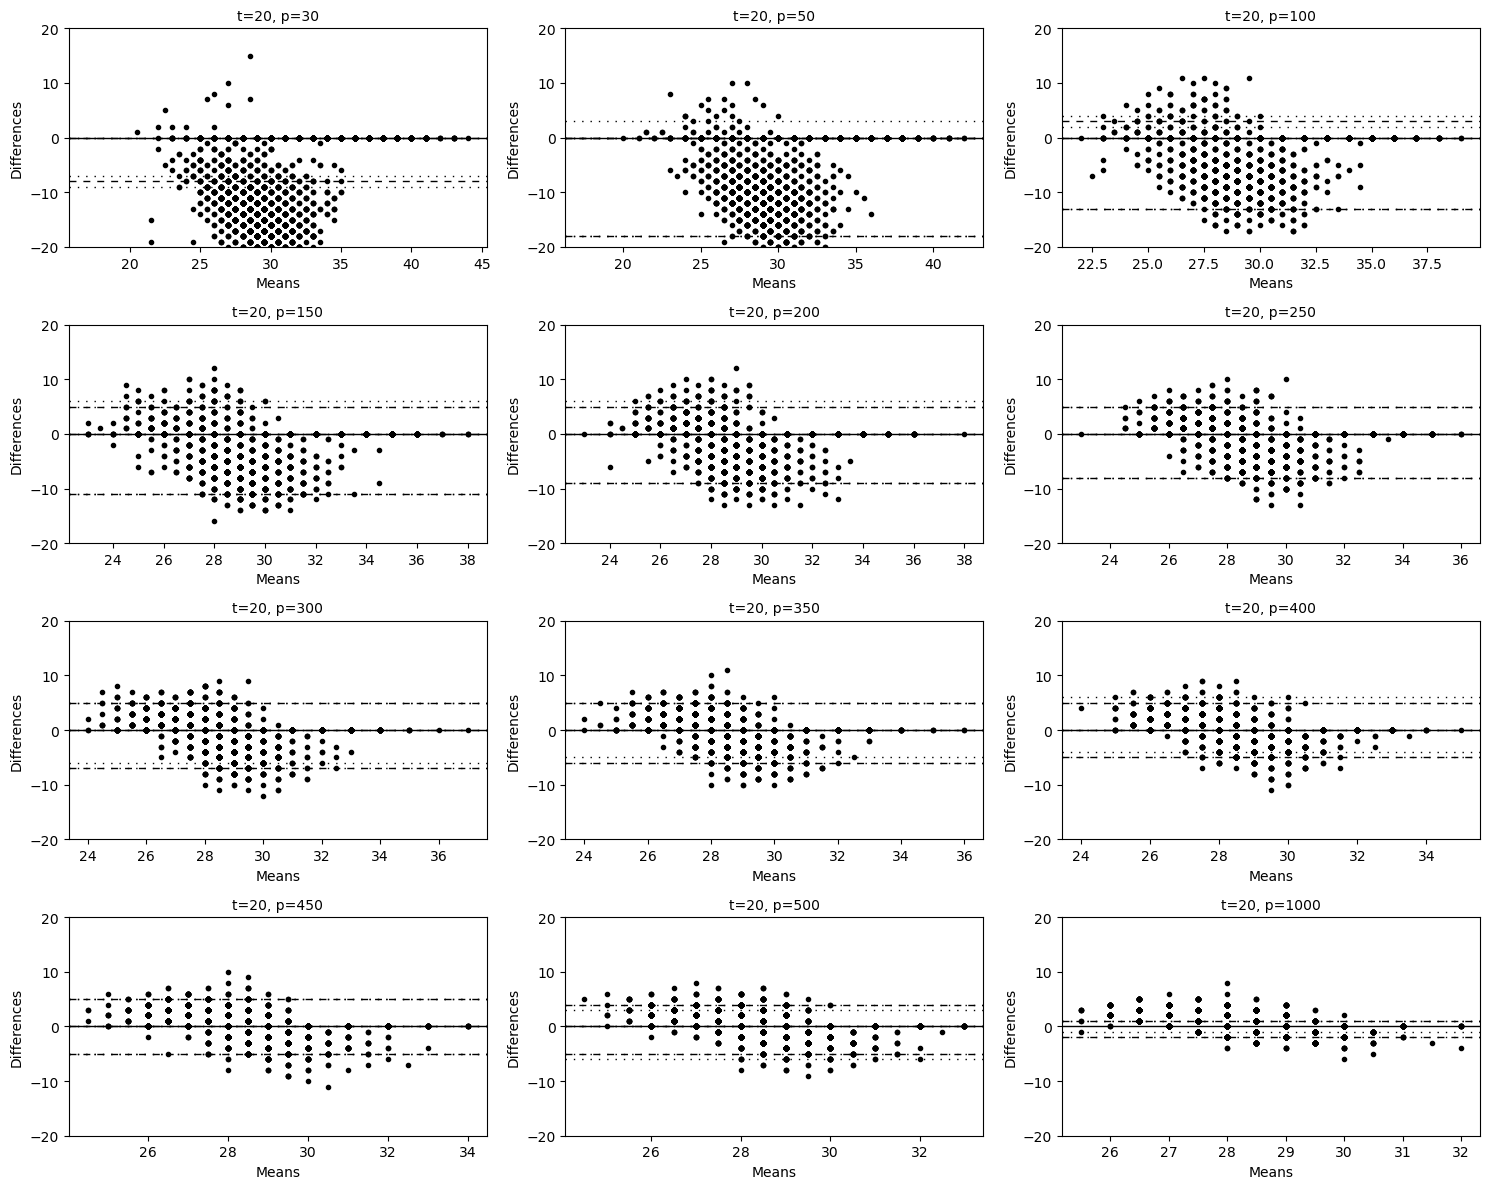

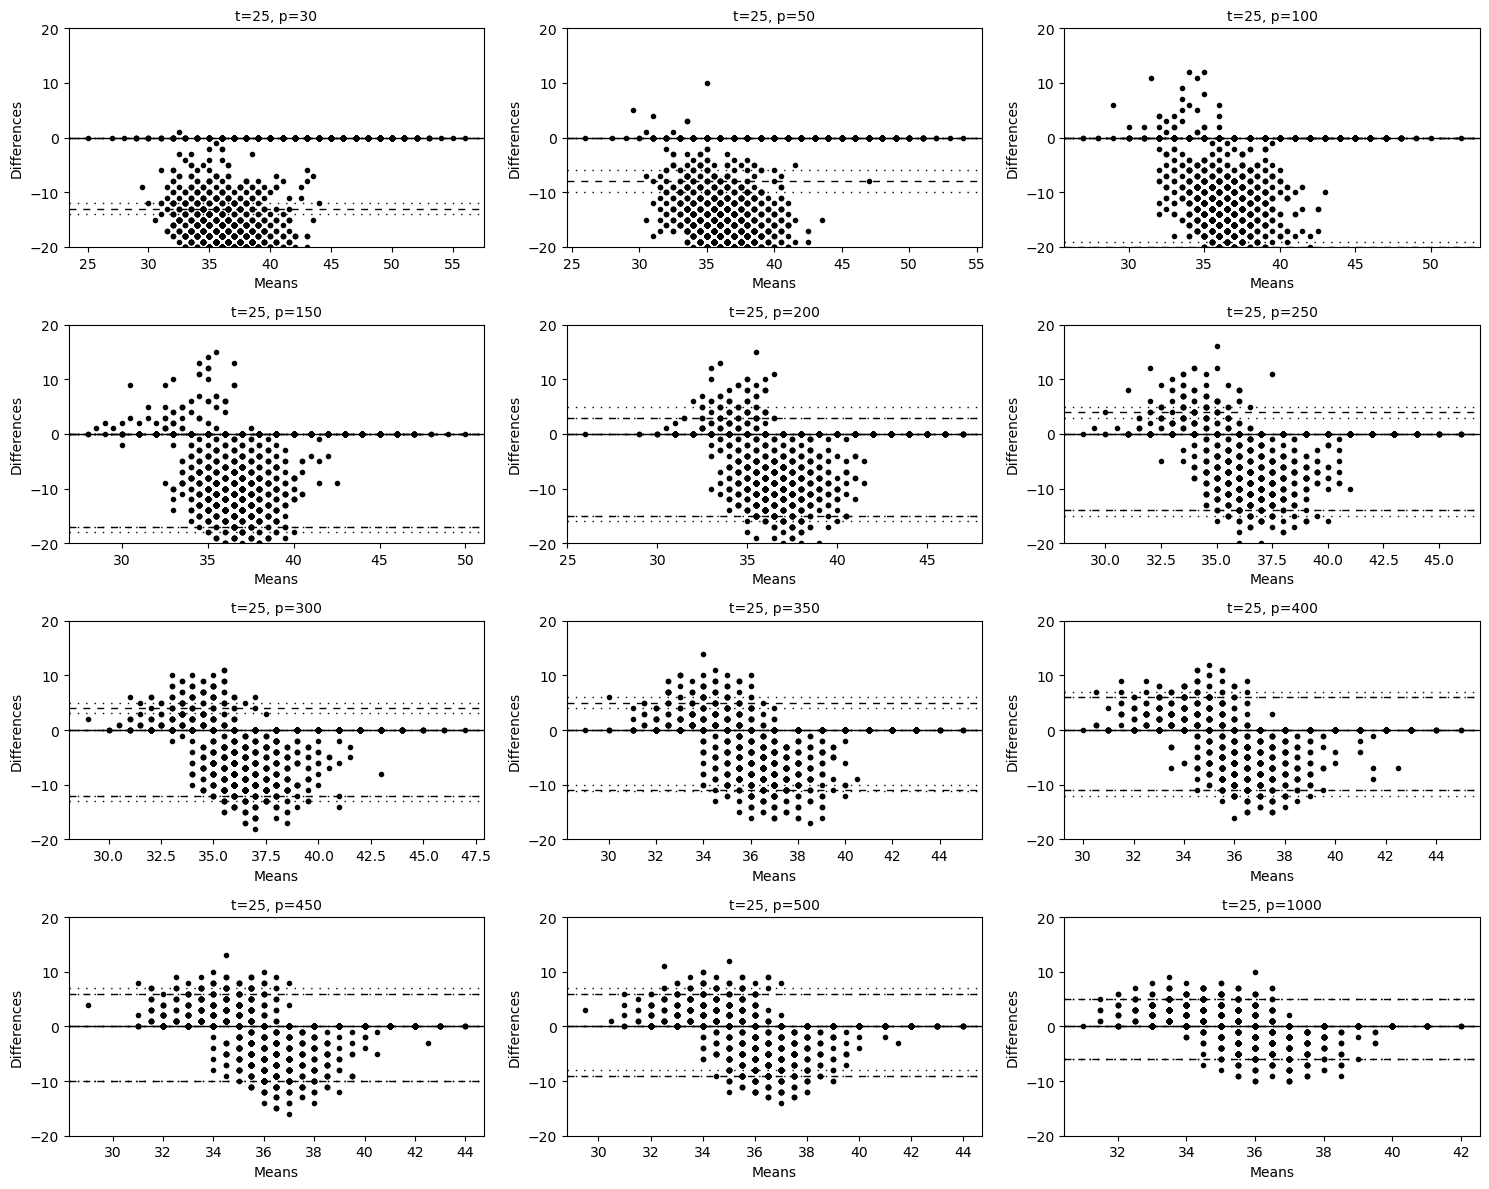

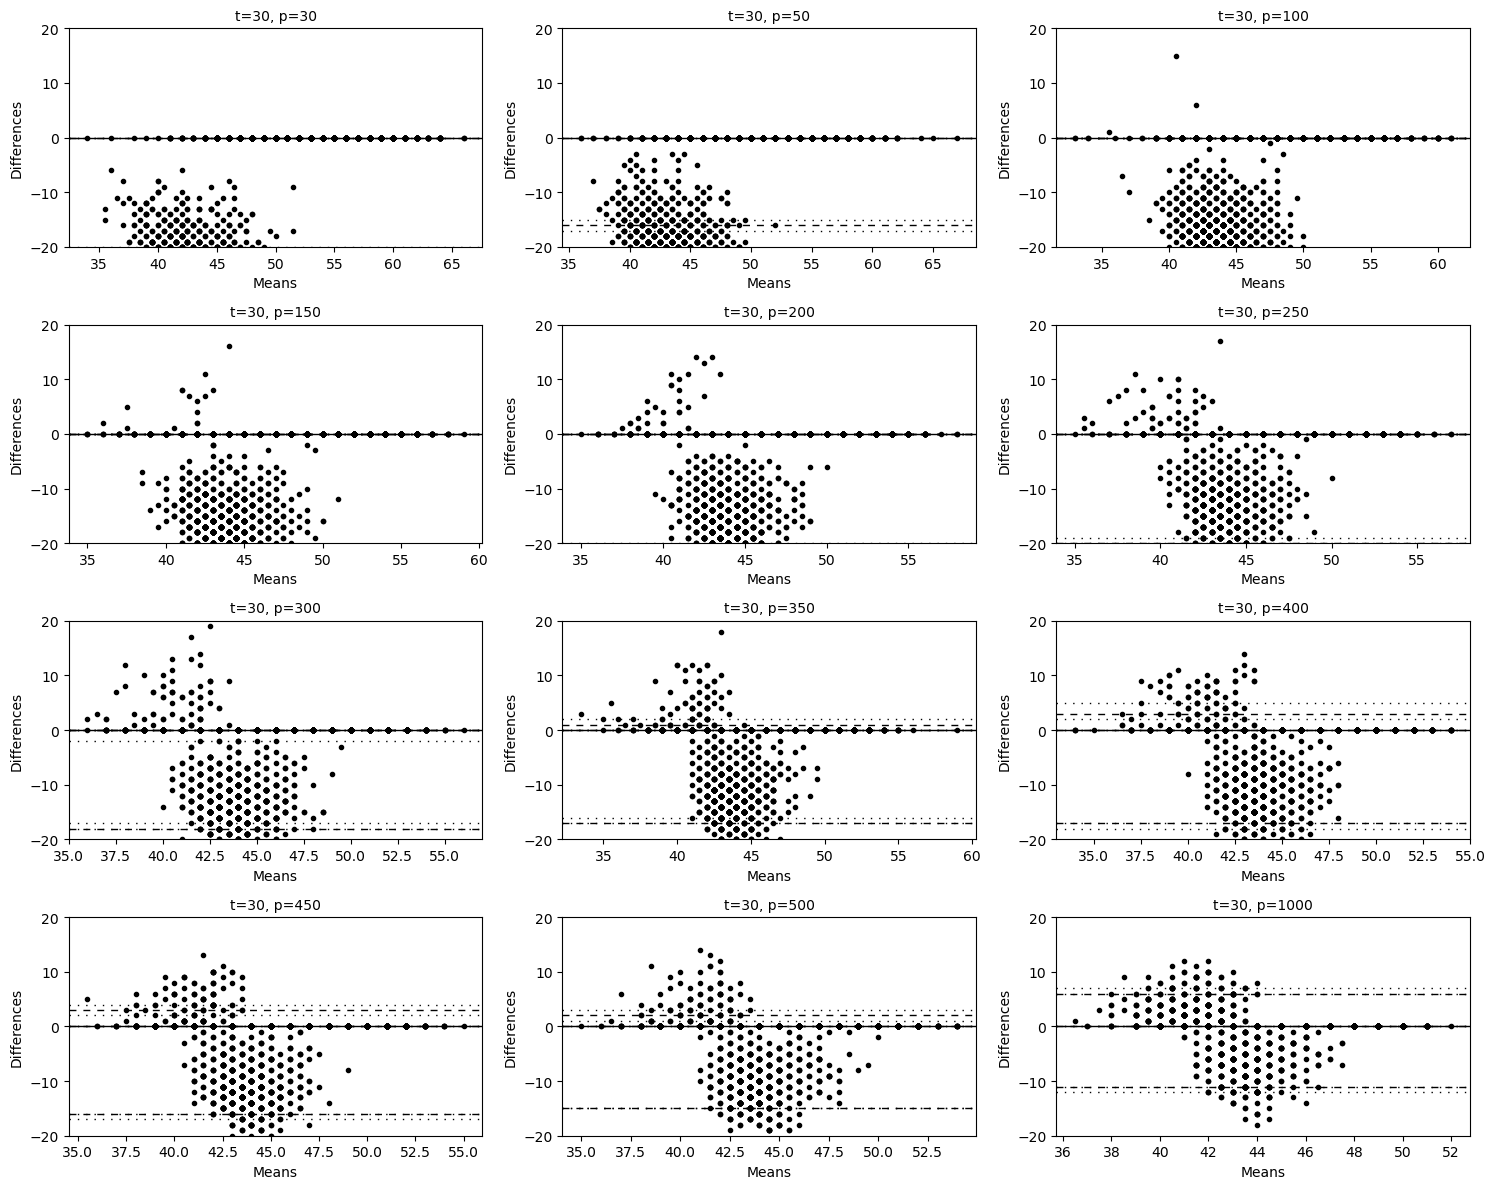

In [3]:
import matplotlib.pyplot as plt

# Örnek veri için etiket sözlükleri
t_labels = {1: '10', 2: '15', 3: '20', 4: '25', 5: '30'}  # t değerlerine göre etiketler
p_labels = {1: '30', 2: '50', 3: '100', 4: '150', 5: '200', 6: '250',
            7: '300', 8: '350', 9: '400', 10: '450', 11: '500', 12: '1000'}

p_values = range(1, 13)

for t in t_labels.keys():
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
    
    for idx, p in enumerate(p_values):
        ax = axes[idx // 3, idx % 3]
        
        subset = data[(data['t'] == t) & (data['p'] == p)]
        
        ax.scatter(subset['mean.cut'], subset['diff.cut'], color="black", marker=".", linewidth=1)
        ax.set_ylim(-20, 20)
        ax.set_xlabel("Means", fontsize=10)
        ax.set_ylabel("Differences", fontsize=10)
        
        t_label = t_labels.get(t, 'Unknown')
        p_label = p_labels.get(p, 'Unknown')
        ax.set_title(f"t={t_label}, p={p_label}", fontsize=10)
        ax.axhline(0, color="black", linestyle="-", linewidth=1)
        
        # Sinir dosyasından median ve güven aralığı değerlerini ekleyin
        sinir_subset = sinir[(sinir['t'] == t) & (sinir['p'] == p)]
        
        ax.axhline(sinir_subset["LoA_upper"].values[0], color="black", linestyle=(0, (5, 5)), linewidth=1)
        ax.axhline(sinir_subset["LoA_upper_l"].values[0], color="black", linestyle=(0, (1, 5)), linewidth=1)
        ax.axhline(sinir_subset["LoA_upper_u"].values[0], color="black", linestyle=(0, (1, 5)), linewidth=1)
      
        ax.axhline(sinir_subset["median"].values[0], color="black", linestyle=(0, (5, 5)), linewidth=1)
        ax.axhline(sinir_subset["median_l"].values[0], color="black", linestyle=(0, (1, 5)), linewidth=1)
        ax.axhline(sinir_subset["median_u"].values[0], color="black", linestyle=(0, (1, 5)), linewidth=1)
        
        ax.axhline(sinir_subset["LoA_lower"].values[0], color="black", linestyle=(0, (5, 5)), linewidth=1)
        ax.axhline(sinir_subset["LoA_lower_l"].values[0], color="black", linestyle=(0, (1, 5)), linewidth=1)
        ax.axhline(sinir_subset["LoA_lower_u"].values[0], color="black", linestyle=(0, (1, 5)), linewidth=1)

    
    plt.tight_layout()
  
    filename = f'C:/Users/pervi/OneDrive/Desktop/Item_{t_labels[t]}_all_samples.jpeg'
    plt.savefig(filename, format='jpeg', dpi=300)
    
    plt.show()
    
    plt.close(fig)